# Neural Network - Single Layer

In [1]:
!cd

C:\Users\06411


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

-------------------------------------------------------------------
## 1. Data (mnist)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:/Users/06411/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting C:/Users/06411/tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting C:/Users/06411/tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting C:/Users/06411/tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting C:/Users/06411/tmp/data/t10k-labels-idx1-ubyte.gz


-------------------------------------------------------------------------
## 2. Simple Layer

### 2-1. Hyper-parameter

In [3]:
training_epochs = 25
batch_size      = 100
learning_rate   = 0.001
display_step    = 1

### 2-2. Input

In [6]:
# 28 * 28 = 784
x = tf.placeholder("float", [None, 784])
# 0부터 9까지
y = tf.placeholder("float", [None, 10])

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

### 2-3. Optimization

In [8]:
activation = tf.nn.softmax(tf.matmul(x, W) + b)
cost       = tf.reduce_mean(-tf.reduce_sum(y*tf.log(activation), reduction_indices = 1))
optimizer  = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### 2-4. tf.Session

Epoch:  0001 cost:  2.045378387
Epoch:  0002 cost:  1.654294074
Epoch:  0003 cost:  1.394511520
Epoch:  0004 cost:  1.217134350
Epoch:  0005 cost:  1.091297661
Epoch:  0006 cost:  0.998292254
Epoch:  0007 cost:  0.926990304
Epoch:  0008 cost:  0.870779896
Epoch:  0009 cost:  0.825022788
Epoch:  0010 cost:  0.787278726
Epoch:  0011 cost:  0.755129359
Epoch:  0012 cost:  0.727574588
Epoch:  0013 cost:  0.704276162
Epoch:  0014 cost:  0.683586085
Epoch:  0015 cost:  0.664747901
Epoch:  0016 cost:  0.648580303
Epoch:  0017 cost:  0.633741009
Epoch:  0018 cost:  0.620862754
Epoch:  0019 cost:  0.608388061
Epoch:  0020 cost:  0.597170247
Epoch:  0021 cost:  0.587466889
Epoch:  0022 cost:  0.577892078
Epoch:  0023 cost:  0.569019603
Epoch:  0024 cost:  0.561268799
Epoch:  0025 cost:  0.553920578
Optimization DONE!
Accuracy:  0.8782
Label:  [7]
Predict:  [7]


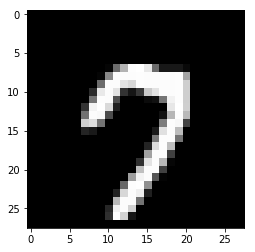

In [9]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        ## mini batch
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)

        ## mini batch training
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict = {x:batch_xs, y:batch_ys})
            avg_cost += sess.run(cost, feed_dict = {x:batch_xs, y:batch_ys}) / total_batch

        ## log print
        if epoch % display_step == 0:
            print("Epoch: ", '%04d' % (epoch + 1), "cost: ", "{:.9f}".format(avg_cost))

    print("Optimization DONE!")
    print("==========================================================")

    
    ## test
    correct_prediction = tf.equal(tf.argmax(activation, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float")) ## cast: same shape as x
    print("Accuracy: ", accuracy.eval({x: mnist.test.images, y:mnist.test.labels}))
    print("==========================================================")

    
    ## predict
    r = random.SystemRandom().randint(0, mnist.test.num_examples -1) ## indx random search

    print("Label: ",   sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))                ## Label:   [2]
    print("Predict: ", sess.run(tf.argmax(activation,1), {x:mnist.test.images[r:r+1]})) ## Predict: [2]

    
    ## plot
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap = 'gray', interpolation = 'nearest')
    plt.show()

--------------------------------------------------------------------------------

*End of Code*